In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
import scipy
import scipy.integrate

In [3]:
subplot_kwargs = dict(
    figsize=(7, 6)
)

savefig_kwargs = dict(
    bbox_inches="tight"
)

## joint

In [4]:
def f(theta):
    return theta ** 2

def likelihood(theta, x):
    return np.exp(-0.5 * (f(theta) - x) ** 2) / np.sqrt(2 * np.pi)

def prior(theta):
    return np.exp(-0.5 * theta ** 2) / np.sqrt(2 * np.pi)

def joint(theta, x):
    return likelihood(theta, x) * prior(theta)

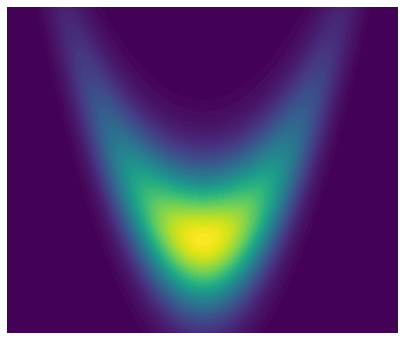

In [5]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = joint(X, Y)

fig, ax = plt.subplots(**subplot_kwargs)
CS = ax.contourf(X, Y, Z, 100)
ax.axis('off');
fig.savefig("banana-joint.png", **savefig_kwargs)

## product of marginals

In [6]:
def evidence(x):
    shape = x.shape
    result = np.asarray([scipy.integrate.quad(lambda theta: joint(theta, xx), -np.inf, np.inf)[0] for xx in x.flatten()])
    return result.reshape(*shape)

In [7]:
ev = evidence(Y[:, 0])
ev = np.repeat(ev[:, None], X.shape[1], axis=1)
marginals = ev * prior(X)

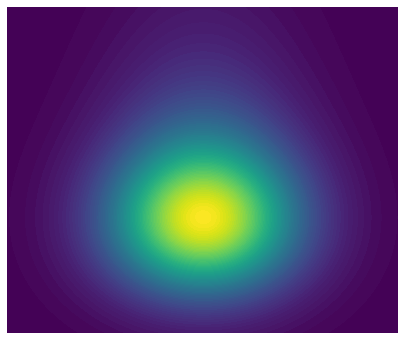

In [8]:
fig, ax = plt.subplots(**subplot_kwargs)
CS = ax.contourf(X, Y, marginals, 100)
ax.axis('off');
fig.savefig("banana-product.png", **savefig_kwargs)

## prior

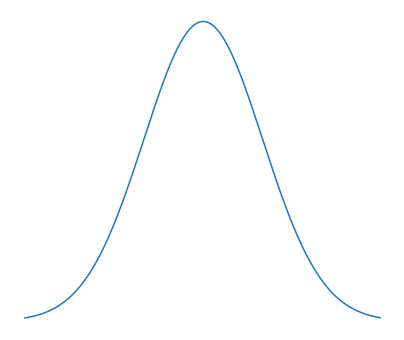

In [9]:
py = prior(x)

fig, ax = plt.subplots(**subplot_kwargs)
ax.plot(x, py)
ax.axis('off');
fig.savefig("banana-prior.png", **savefig_kwargs)